In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats


from math import cos, exp, pi
from scipy.integrate import quad

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

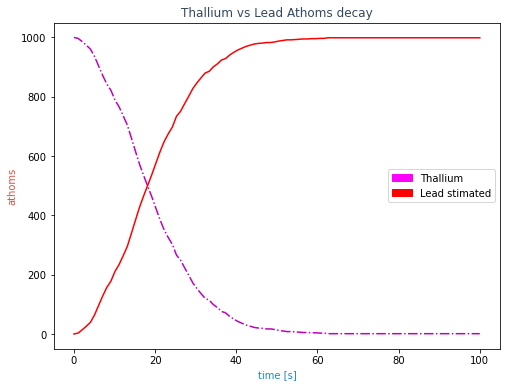

Text(0, 0.5, 'Thallium atoms')

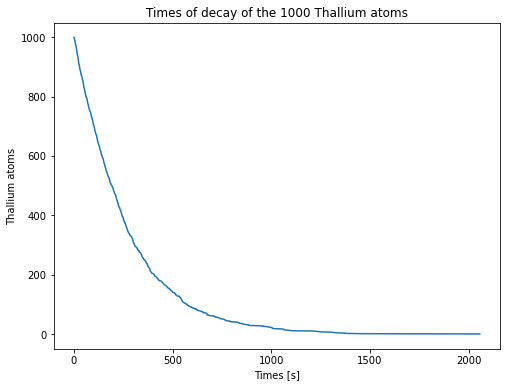

In [74]:

#Time
tau = 3.052*60 #seconds
#Athoms
ThA = 1000 #Tallium
LaA = 0 #Lead

def pdf(t, tau):
    return 1-2**(-t/tau)

time = np.linspace(0, 100, 100)
athoms_Th = np.zeros(100)
athoms_Th[0] = ThA

athoms_La = np.zeros(100)
athoms_La[0] = LaA
# Step 1
for t in range(1, 100, 1):
    to_subtract = 0
    instant_prob = pdf(t, tau)
    for i in range(1, ThA, 1): # For every ThA try to see if decaded
        a = 0
        if np.random.rand() <= instant_prob: # Decayed, if the uniform is under this it must be decayed
            a=1
        else:                                #Not Decayed
            a=0
        to_subtract = to_subtract +  a # Count decayed athoms
    ThA = ThA - to_subtract # subtract decayed athoms
    LaA = LaA + to_subtract
    athoms_Th[t] = ThA
    athoms_La[t] = LaA
    #print(ThA)


x = time
y = athoms_Th
y_new = athoms_La
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'm-.', x,y_new, 'r')
plt.xlabel('time [s]', color='#1e8bc3')
plt.ylabel('athoms', color='#e74c3c')
plt.title('Thallium vs Lead Athoms decay', color='#34495e')
sigma = mpatches.Patch(color='magenta', label='Thallium')
sigma_stim = mpatches.Patch(color='red', label='Lead stimated')
plt.legend(handles=[sigma, sigma_stim])
plt.show()




#second method

# Decaying pdf
def decay_pdf(t):
    tau = 3.052*60 #seconds
    return (2**(-t/tau))*(np.log(2)/tau)

def decay_cdf(x): # integral of the pdf
    tau = 3.052*60 #seconds
    return (1- 2**(-x/tau) )

def inv_decay_cdf(y):
    tau = 3.052*60 #seconds
    return - tau*np.log2(1-y)


fig = plt.figure(figsize=(8,6))
x = np.arange(0,2000,1)

# apply the inverse of the inverse transform method
n = 1000
athoms_prob = np.random.random(n)
dacay_time = inv_decay_cdf(athoms_prob)  #apply the inverse of the CDF

dacay_time_sorted = np.sort(dacay_time)[::-1]
#print(dacay_time_sorted)
x = np.arange(0,len(dacay_time_sorted),1)
plt.plot(dacay_time_sorted,x)
plt.title('Times of decay of the 1000 Thallium atoms')
plt.xlabel('Times [s]')
plt.ylabel('Thallium atoms')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

/tmp/ipykernel_61889/814870727.py:1: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda x : np.sin(1/(1-x))**2
/tmp/ipykernel_61889/814870727.py:1: RuntimeWarning: invalid value encountered in sin
  f = lambda x : np.sin(1/(1-x))**2


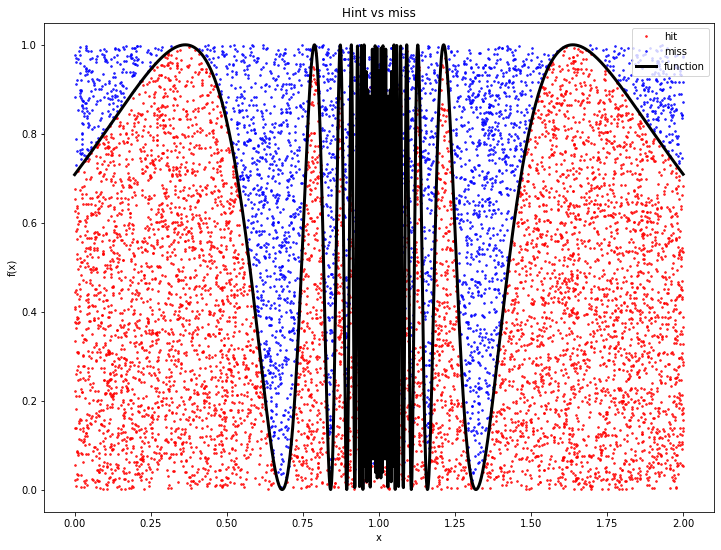

The Hit & Miss estimate of the integral of f(x) on 0 < x < 2 is: 1.3574
The standard error is:  0.0009820518112604853
The difference from the previous with 100 repetition mean is :  0.011267999999999834

The value of the integral with the mean value method is:  1.3508831430366532
The standard error is:  0.000751009067353006
The difference from the previous with 100 repetition mean is :  0.0036014389644776212


In [21]:
f = lambda x : np.sin(1/(1-x))**2

n = int(1e4)
hits = 0
misses = 0
xH = []
yH = []
xM = []
yM = []
for i in range(n):
    x = 2*np.random.uniform()
    y = np.random.uniform()
    if y <= f(x):
        hits += 1
        xH = xH + [x]
        yH = yH + [y]
    else:
        misses += 1
        xM = xM + [x]
        yM = yM + [y]
intEst = 2*hits/n

# Plot the function as  a line and the add the hits and misses as scatter
# plots.
plt.figure(figsize=(12,9))
plt.plot(xH, yH, 'ro', fillstyle = 'none', markersize = 1.5, label='hit')
plt.plot(xM, yM, 'bo', fillstyle = 'none', markersize = 1.5, label='miss')
x = np.arange(0, 2, 0.001)
plt.plot(x, f(x), 'k-', linewidth = 3, label='function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Hint vs miss')
plt.legend(loc='best')
plt.show()

# Repeat the integral N tymes to have a statistic of the first method
N = 100
hits = 0
integrals = np.zeros(N)
for j in range(N):
    hits = 0
    for i in range(n):
        x = 2*np.random.uniform()
        y = np.random.uniform()
        if y <= f(x):
            hits += 1
        else:
            misses += 1
    integrals[j] = 2*hits/n
mean = np.mean(integrals)
variance = np.var(integrals)
std_error= np.sqrt(variance/N)
print('The Hit & Miss estimate of the integral of f(x) on 0 < x < 2 is:', intEst)
print('The standard error is: ', std_error)
print('The difference from the previous with 100 repetition mean is : ', abs(mean- intEst))



# Second method:
b = np.random.uniform(0,2,n)
y = f(b)
I = 2*np.mean(y)
print('\nThe value of the integral with the mean value method is: ', I)

# Repeat the integral N tymes to have a statistic of the second method
N = 100
integrals = np.zeros(N)
for j in range(N):
    b = np.random.uniform(0,2,n)
    applied = f(b)
    integrals[j] = 2*np.mean(applied)
mean = np.mean(integrals)
variance = np.var(integrals)
std_error= np.sqrt(variance/N)
print('The standard error is: ', std_error)
print('The difference from the previous with 100 repetition mean is : ', abs(mean- I))


# we find that it is a little bit better the second method

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [19]:
#                  | 1    x^2 + y^2 + z^2 +... <= 1
# f(x, y, z...) = -|
#                  | 0    elsewere
# Generalized dimensions spheres 
def f(x):
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i]**2
    if sum <= 1:
        return 1
    else:
        return 0

# 2 D sphere
# Number of dimension of the sphere
dim = 2
# Number of points to compute the volume
points = 100000

x = np.random.uniform(-1, 1, (points, dim))
# Apply the function to the points
values = np.zeros(points)
for i in range(points):
    values[i] = f(x[i, :])
#Compute the integral
I = (2**dim)*np.mean(values)
print('The area of the circle is: ', I)


# 10D sphere
# Number of dimension of the sphere
dim = 10
# Number of points to compute the volume
points = 10000

x = np.random.uniform(-1, 1, (points, dim))
# Apply the function to the points
values = np.zeros(points)
for i in range(points):
    values[i] = f(x[i, :])
#Compute the integral
I = (2**dim)*np.mean(values)
print('The value of the 10D sphere is: ', I)
# My pc is not able to add as many point need to compute it

The area of the circle is:  3.13728
The value of the 10D sphere is:  2.2528


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [44]:
# Define functions:
def f(x):
    return (x**(-1/2)) / (np.exp(x) + 1)
def w(x):
    return 1 / np.sqrt(x)

#Let's start computing the integral of w
N = 100000

# call quad to integrate f from 0 to 1
w_value, err = quad(w, 0, 1)
#print(w_value)

# Use exp distr.
x = stats.powerlaw.rvs(0.5, size = N)

# compute the integral:
ratio = f(x) / w(x)
cum = np.sum(ratio)
I = w_value/ N *cum
print('The value of the integral is: ',I)

The value of the integral is:  0.8392066492127114
